In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv("Dataset.csv")

In [3]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 6:7].values

In [4]:
le = LabelEncoder()
dataset['Date']= le.fit_transform(dataset['Date'])

In [5]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fit Logistic Regression to the Training set
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=0)

In [8]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [9]:
if(y_pred.all()<2.5):
    y_pred=np.round(y_pred-0.5)
    
else:
    y_pred=np.round(y_pred+0.5)

#Calculationg the error and accuracy

df1=(y_pred-y_test)/y_test
df1=round(df1.mean()*100,2)
print("Error = ",df1,"%") 
a=100-df1
print("Accuracy= ",a,"%")

Error =  23.29 %
Accuracy=  76.71000000000001 %


Mean Absolute Error(MAE): 1.4861111111111112
Mean Squared Error(MSE): 3.4537037037037037
Root Mean Squared Error(RMSE): 1.8584142981864145
R-squared Score: -0.7057926829268295
Mean Squared Logarithmic Error (MSLE): 0.29617138399531556


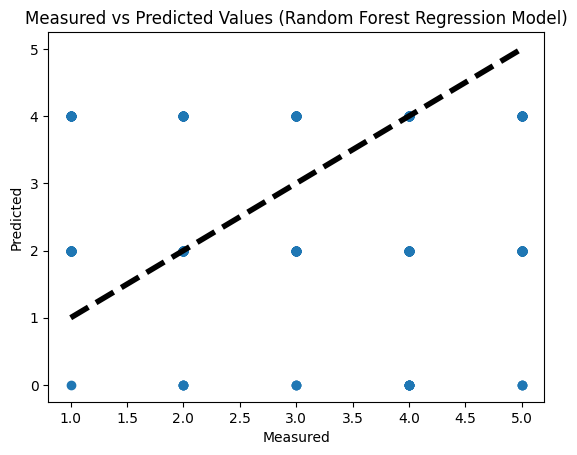

In [10]:
# Calculating Metrics
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:', r2_score(y_test, y_pred))

try:
    print('Mean Squared Logarithmic Error (MSLE):', mean_squared_log_error(y_test,y_pred))
except:
    print("Can't calculate MSLE because it's not defined for negative values")

# Creating plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Measured vs Predicted Values (Random Forest Regression Model)')
plt.show()

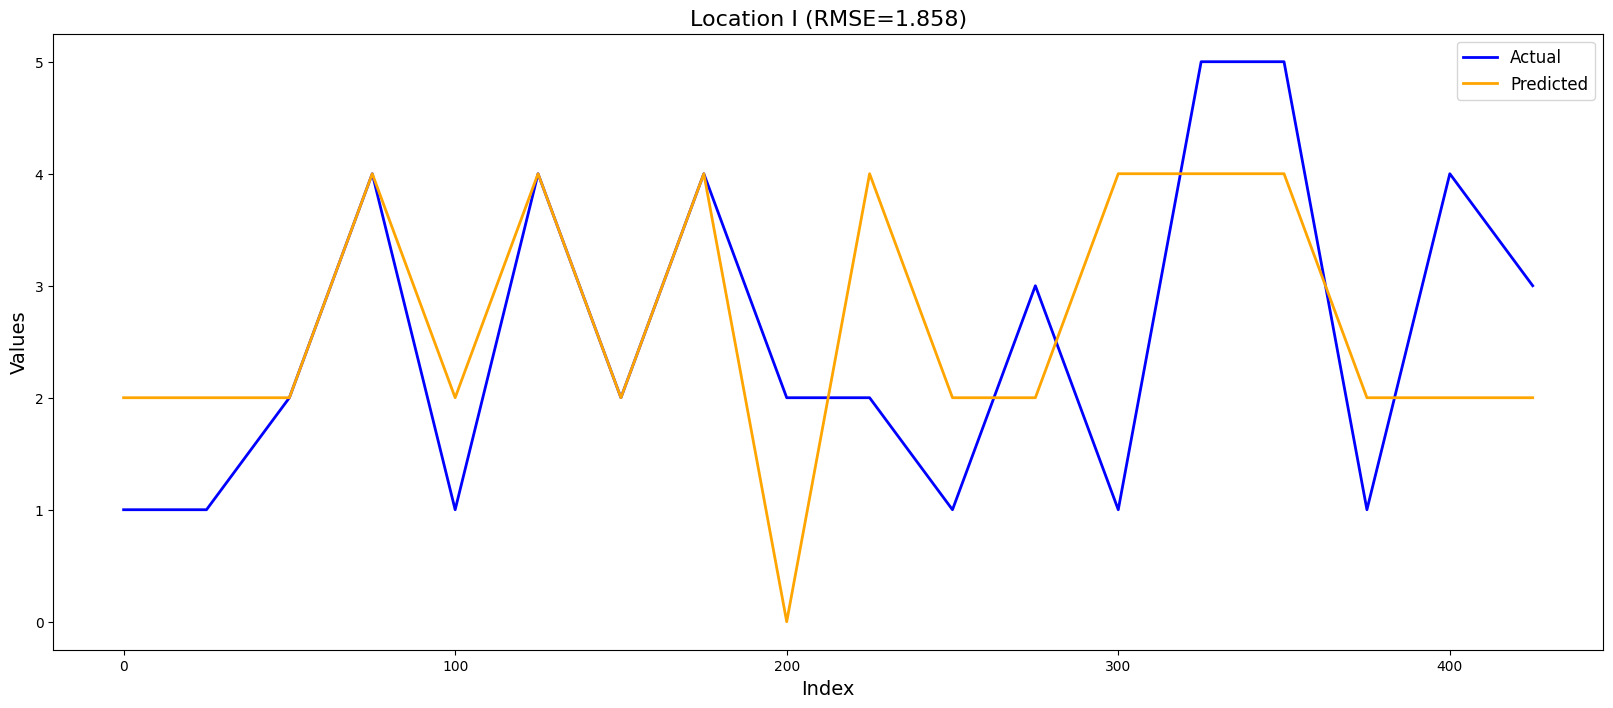

In [11]:

from sklearn.metrics import mean_squared_error



# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Sample points for a clearer plot (if necessary)
step = 25  # Adjust this step size depending on your dataset's size
index = np.arange(0, len(y_test), step)
sampled_y_test = y_test[::step]
sampled_y_pred = y_pred[::step]

# Creating the plot
plt.figure(figsize=(20, 8))  # Increased figure size for clarity
plt.plot(index, sampled_y_test, label='Actual', color='blue', linewidth=2)
plt.plot(index, sampled_y_pred, label='Predicted', color='orange', linewidth=2)
plt.title(f"Location I (RMSE={rmse:.3f})", fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.show()
